# Prostate Cancer Analysis: A Step-by-Step Study Tool

## Introduction
Welcome to this interactive study tool! This notebook is designed to teach you how to analyze real-world health data using R. We will replicate a professional epidemiological analysis of Prostate Cancer trends in England.

**What you will learn:**
1.  **Data Wrangling:** How to load, clean, and filter complex datasets using the `tidyverse`.
2.  **Data Visualization:** How to create professional line charts and stacked bar charts using `ggplot2`.
3.  **Epidemiological Concepts:** Understanding Incidence Rates, Age Standardization, and Stage Migration.

## Prerequisites
Before we begin, ensure you have the following:
1.  **R Kernel**: This notebook runs on R. Ensure the R kernel is selected in Jupyter.
2.  **Data File**: You need the file `GDO_data_wide.csv` in a `data` folder.
    *   *Download:* [NHS Get Data Out](https://nhsd-ndrs.shinyapps.io/get_data_out/)
    *   *Location:* `../data/GDO_data_wide.csv` relative to this notebook.

---

## Module 1: Setup & Data Loading

First, we need to load the necessary tools. In R, we use "packages". The most important package for data science is the **tidyverse**, a collection of tools for data manipulation and visualization.

**Key Functions:**
*   `library()`: Loads a package so we can use its functions.
*   `read.csv()`: Reads a Comma Separated Values file into a data frame (table).

In [9]:
# Load the tidyverse package
library(tidyverse)

# Define the path to our data file
data_path <- "../data/GDO_data_wide.csv"

# Check if the file exists before trying to load it
if (!file.exists(data_path)) {
  stop("Data file not found! Please download GDO_data_wide.csv and place it in the '../data/' directory.")
}

# Load the data into a variable named 'df' (short for data frame)
    df <- read.csv(data_path, ;,/N B CL = FALSE)

# Print a success message with the number of rows loaded
cat("Data loaded successfully. Total rows:", nrow(df), "\n")

Data loaded successfully. Total rows: 56610 


### ✍️ Try it yourself!
Inspect the data you just loaded. In the cell below, type `head(df)` and run it to see the first 6 rows of the dataset. This helps you understand what the columns look like.

In [10]:
# Type your code here:
head(df)

,Cancer.Site,Year,Tumour.Type,Tumour.Type.2,Tumour.Type.3,Tumour.Type.4,Tumour.Type.5,Tumour.Type.6,Tumour.Type.7,Basis.of.Diagnosis,⋯,Net.survival.84m.UCI,Kaplan.Meier.survival.84m,Kaplan.Meier.survival.84m.LCI,Kaplan.Meier.survival.84m.UCI,Net.survival.96m,Net.survival.96m.LCI,Net.survival.96m.UCI,Kaplan.Meier.survival.96m,Kaplan.Meier.survival.96m.LCI,Kaplan.Meier.survival.96m.UCI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"Bladder, urethra, renal pelvis and ureter",2013,All,All,All,All,All,All,All,All,⋯,70.6,50.7,50,51.4,67.4,65.8,68.9,47,46.3,47.8
2,"Bladder, urethra, renal pelvis and ureter",2013,Renal pelvis and ureter,All,All,All,All,All,All,All,⋯,55.9,38.1,35.5,40.8,52.8,48.3,57.4,35.7,33.2,38.3
3,"Bladder, urethra, renal pelvis and ureter",2013,Renal pelvis and ureter,Malignant and in situ,All,All,All,All,All,All,⋯,54,36.5,33.9,39.2,50.8,46.1,55.6,34.3,31.6,36.9
4,"Bladder, urethra, renal pelvis and ureter",2013,Renal pelvis and ureter,Malignant and in situ,All,All,All,All,All,All,⋯,83.4,57.1,52.6,61.3,75.8,67.8,83.8,53.2,48.7,57.5
5,"Bladder, urethra, renal pelvis and ureter",2013,Renal pelvis and ureter,Malignant and in situ,All,All,All,All,All,All,⋯,85.2,59.6,54.2,64.7,73.6,64.1,83.1,55.5,50,60.6
6,"Bladder, urethra, renal pelvis and ureter",2013,Renal pelvis and ureter,Malignant and in situ,All,All,All,All,All,All,⋯,90.8,61.7,54.5,68.1,77,64.3,89.7,57.7,50.4,64.2


---

## Module 2: Understanding the Data Structure

The "Get Data Out" dataset is unique. It is in a **Stratified Long Format**.

**What does this mean?**
Instead of one row per patient, we have pre-calculated statistics for various groups. The data is sliced (stratified) by:
*   `Region` (e.g., "All England", "London")
*   `Age` (e.g., "All", "60-69", "70-79")
*   `Stage` (e.g., "All", "Stage 1", "Stage 4")
*   `Gender` (e.g., "Male", "Female")

**⚠️ CRITICAL WARNING:**
Because the data contains both "All" (totals) and specific subgroups, **you cannot simply sum up the rows**. If you sum the "Incidence" column, you will count every patient multiple times (once in their age group, once in "All Ages", once in their region, once in "All England", etc.).

**The Solution:**
We must always **FILTER** the data to isolate exactly one set of mutually exclusive groups.

---

## Module 3: Incidence Trends (Data Wrangling)

**Objective:** We want to see how the rate of new Prostate Cancer cases has changed over time in England.

**The Filter Strategy:**
To get the national trend for men of all ages and stages, we apply these filters:
1.  `Cancer.Site == "Prostate"`
2.  `Region == "All England"` (National level)
3.  `Gender == "Male"`
4.  `Age == "All"` (We want the total, not specific age brackets)
5.  `Stage == "All"` (We want all cases, regardless of stage)
6.  `nchar(Year) == 4` (Removes rolling averages like "2013-2015")

**Key Functions:**
*   `%>%` (Pipe): Passes the result of one step to the next.
*   `filter()`: Selects rows that match your criteria.
*   `mutate()`: Creates or modifies columns (e.g., converting text to numbers).

In [11]:
# Create a new dataset 'incidence_data' by filtering the raw 'df'
incidence_data <- df %>%
  filter(Cancer.Site == "Prostate",
         Region == "All England",
         Gender == "Male",
         Age == "All",
         Stage == "All",
         nchar(Year) == 4) %>%
  # Convert Year and Rate to numbers for plotting
  mutate(Year = as.numeric(Year),
         Rate = as.numeric(Age.Gender.Standardised.Incidence.Rate))

# View the result
head(incidence_data)

,Cancer.Site,Year,Tumour.Type,Tumour.Type.2,Tumour.Type.3,Tumour.Type.4,Tumour.Type.5,Tumour.Type.6,Tumour.Type.7,Basis.of.Diagnosis,⋯,Kaplan.Meier.survival.84m,Kaplan.Meier.survival.84m.LCI,Kaplan.Meier.survival.84m.UCI,Net.survival.96m,Net.survival.96m.LCI,Net.survival.96m.UCI,Kaplan.Meier.survival.96m,Kaplan.Meier.survival.96m.LCI,Kaplan.Meier.survival.96m.UCI,Rate
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Prostate,2013,All,All,All,All,All,All,All,All,⋯,64.3,63.8,64.8,80.8,80,81.7,60.6,60.2,61.1,196.522
2,Prostate,2014,All,All,All,All,All,All,All,All,⋯,64.7,64.2,65.2,.a,.a,.a,.a,.a,.a,185.401
3,Prostate,2015,All,All,All,All,All,All,All,All,⋯,.a,.a,.a,.a,.a,.a,.a,.a,.a,184.653
4,Prostate,2016,All,All,All,All,All,All,All,All,⋯,.a,.a,.a,.a,.a,.a,.a,.a,.a,181.290
5,Prostate,2017,All,All,All,All,All,All,All,All,⋯,.a,.a,.a,.a,.a,.a,.a,.a,.a,179.263
6,Prostate,2018,All,All,All,All,All,All,All,All,⋯,.a,.a,.a,.a,.a,.a,.a,.a,.a,210.055


### ✍️ Try it yourself!
Copy the code block above, but change `Cancer.Site` to `"Breast"` and `Gender` to `"Female"`. Save it as `breast_cancer_data` and view the head.

In [12]:
# Your code here:
# Create a new dataset 'incidence_data' by filtering the raw 'df'


Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


Cancer.Site,Year,Tumour.Type,Tumour.Type.2,Tumour.Type.3,Tumour.Type.4,Tumour.Type.5,Tumour.Type.6,Tumour.Type.7,Basis.of.Diagnosis,⋯,Kaplan.Meier.survival.84m,Kaplan.Meier.survival.84m.LCI,Kaplan.Meier.survival.84m.UCI,Net.survival.96m,Net.survival.96m.LCI,Net.survival.96m.UCI,Kaplan.Meier.survival.96m,Kaplan.Meier.survival.96m.LCI,Kaplan.Meier.survival.96m.UCI,Rate
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>


---

## Module 4: Visualizing Trends (ggplot2)

Now we visualize the data using `ggplot2`. This package builds plots in **layers**.

**The Layers:**
1.  `ggplot(data, aes(x, y))`: Sets up the canvas. `aes` maps data columns to visual properties (axes).
2.  `geom_line()`: Draws the line connecting points.
3.  `geom_point()`: Adds dots for each data point.
4.  `scale_...()`: Controls the axis ranges and labels.
5.  `labs()`: Adds titles and captions.
6.  `annotate()`: Adds custom text or arrows to highlight specific events.
7.  `theme_minimal()`: Applies a clean, professional style.

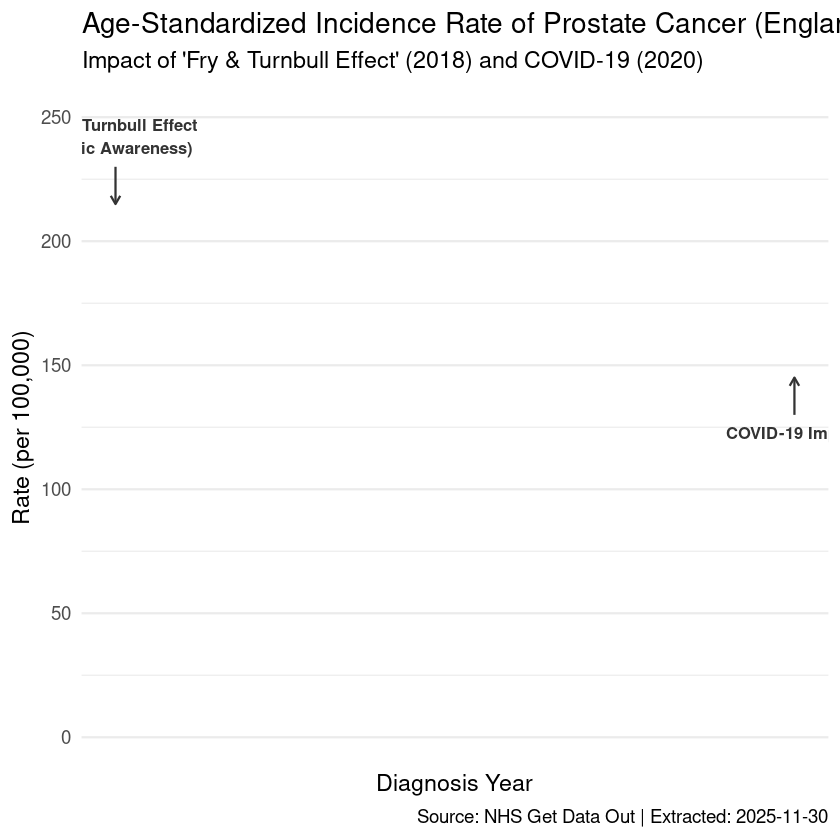

In [15]:
ggplot(incidence_data, aes(x = Year, y = Rate)) +
  # Layer 1: The Line
  geom_line(color = "#2c3e50", linewidth = 1) +
  
  # Layer 2: The Points
  geom_point(color = "#2c3e50", size = 3) +
  
  # Layer 3: Axis Scales
  scale_x_continuous(breaks = unique(incidence_data$Year)) +
  scale_y_continuous(limits = c(0, 250)) +
  
  # Layer 4: Labels
  labs(title = "Age-Standardized Incidence Rate of Prostate Cancer (England)",
       subtitle = "Impact of 'Fry & Turnbull Effect' (2018) and COVID-19 (2020)",
       x = "Diagnosis Year",
       y = "Rate (per 100,000)",
       caption = paste0("Source: NHS Get Data Out | Extracted: ", Sys.Date())) +
  
  # Layer 5: Annotations (The Storytelling)
  annotate("text", x = 2018, y = 235, label = "Fry & Turnbull Effect\n(Public Awareness)", 
           vjust = 0, fontface = "bold", size = 3.5, color = "#333333") +
  annotate("segment", x = 2018, xend = 2018, y = 230, yend = 215, 
           arrow = arrow(length = unit(0.2, "cm")), color = "#333333") +
  
  annotate("text", x = 2020, y = 125, label = "COVID-19 Impact", 
           vjust = 1, fontface = "bold", size = 3.5, color = "#333333") +
  annotate("segment", x = 2020, xend = 2020, y = 130, yend = 145, 
           arrow = arrow(length = unit(0.2, "cm")), color = "#333333") +
  
  # Layer 6: Theme
  theme_minimal(base_size = 14)

### ✍️ Try it yourself!
Modify the code above to plot your `breast_cancer_data`. Change the title and the line color (try `"#e74c3c"` for red).

In [ ]:
# Your code here:


---

## Module 5: Stage Shift Analysis

**The Question:** Did the COVID-19 pandemic cause patients to be diagnosed at a later stage?

To answer this, we need to look at the **proportion** of cases diagnosed at Stage 1, 2, 3, and 4 over time.

**Data Wrangling Steps:**
1.  **Filter:** Select only the specific stages (Localised, Locally Advanced, Metastatic, Unknown).
2.  **Factor:** Define the order of stages for the plot (so "Unknown" is at the top/bottom as desired).
3.  **Calculate Proportions:**
    *   `group_by(Year)`: Process each year separately.
    *   `mutate(Proportion = Count / sum(Count))`: Calculate the % for each stage within that year.

In [16]:
# 1. Define the stages we want
target_stages <- c("Stage localised", "Stage locally advanced", "Stage metastatic", "Stage unknown")

# 2. Filter the data
stage_data <- df %>%
  filter(Cancer.Site == "Prostate",
         Region == "All England",
         Gender == "Male",
         Age == "All",
         Stage %in% target_stages,
         nchar(Year) == 4) %>%
  mutate(Year = as.numeric(Year),
         Incidence = as.numeric(Incidence))

# 3. Set the order of stages (Factor Levels)
# This determines the order in the stacked bar chart
stage_data$Stage <- factor(stage_data$Stage, 
                           levels = c("Stage unknown", "Stage metastatic", "Stage locally advanced", "Stage localised"))

# 4. Calculate Proportions
stage_props <- stage_data %>%
  group_by(Year, Stage) %>%
  summarise(Count = sum(Incidence), .groups = "drop") %>%
  group_by(Year) %>%
  mutate(Proportion = Count / sum(Count))

# View the calculated proportions
head(stage_props)

Year,Stage,Count,Proportion
<dbl>,<fct>,<dbl>,<dbl>
2013,Stage unknown,9428,0.11455093
2013,Stage metastatic,9974,0.12118488
2013,Stage locally advanced,23500,0.28552683
2013,Stage localised,39402,0.47873736
2014,Stage unknown,6473,0.07750703
2014,Stage metastatic,10702,0.12814464


## Module 6: Stacked Bar Charts

We use `geom_bar(position = "fill")` to create a 100% stacked bar chart. This allows us to compare the *distribution* of stages across years, regardless of the total number of cases.

**Colors:** We use `scale_fill_manual()` to assign specific colors to each stage. Using a gradient of blues helps visualize the progression of severity.

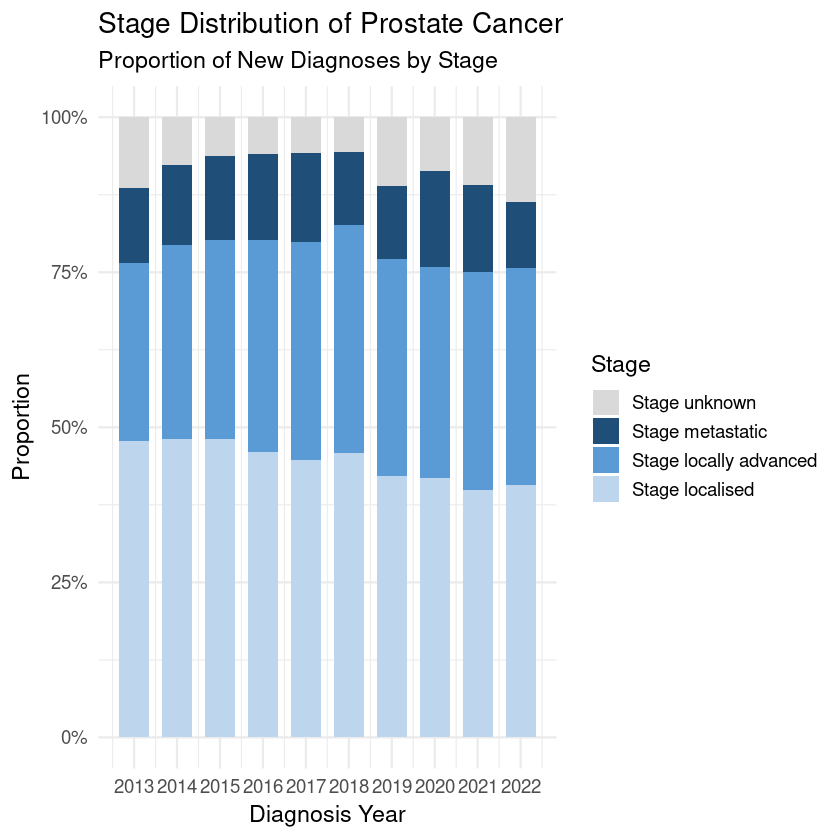

In [17]:
ggplot(stage_props, aes(x = Year, y = Proportion, fill = Stage)) +
  # Create the stacked bars
  geom_bar(stat = "identity", position = "fill", width = 0.7) +
  
  # Format Y-axis as percentages
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(breaks = unique(stage_props$Year)) +
  
  # Custom Colors
  scale_fill_manual(values = c("Stage localised" = "#BDD6EE",       # Light Blue
                               "Stage locally advanced" = "#5B9BD5",# Medium Blue
                               "Stage metastatic" = "#1F4E79",      # Dark Blue
                               "Stage unknown" = "#D9D9D9")) +      # Grey
  
  # Labels
  labs(title = "Stage Distribution of Prostate Cancer",
       subtitle = "Proportion of New Diagnoses by Stage",
       x = "Diagnosis Year",
       y = "Proportion",
       fill = "Stage") +
  
  theme_minimal(base_size = 14)

### ✍️ Try it yourself!
What happens if you remove `position = "fill"` from `geom_bar`? Try it in the cell below. You will see the *absolute counts* instead of proportions. This is useful to see the drop in total cases during 2020.

In [ ]:
# Copy the plot code above and remove 'position = "fill"'


## Conclusion
You have successfully:
1.  Loaded a complex health dataset.
2.  Filtered it to isolate a specific cancer cohort.
3.  Visualized incidence trends with annotations.
4.  Analyzed stage migration using stacked bar charts.

This workflow is the foundation of modern health data science. You can now apply these techniques to any other cancer site in the dataset!